Having created a file with Gaia/PS1 photometry with notebook LSST-Bright-Gaia-PS1-Query, we will now do out analysis and make plots!


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
from astropy.table import Table

#filename='LSST-Gaia-PS1-12-20-30000.fits'
filename='lsst_gaia_ps1_300000.fits'
results = Table.read(filename)

In [4]:
#one bad thing is that the no data fields become 1e20. 

In [5]:
results

source_id,ra,dec,parallax,parallax_over_error,phot_g_mean_mag,bp_rp,l,b,g_mean_psf_mag,r_mean_psf_mag,i_mean_psf_mag,z_mean_psf_mag,y_mean_psf_mag
,deg,deg,mas,,mag,mag,deg,deg,,mag,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64
2951678517123505664,98.25784785161115,-13.413857803067422,0.8105111558938087,30.000006,15.14906,0.92402077,222.92699143600586,-10.092280369733581,15.603099822998,15.1499996185303,14.9773998260498,14.8973999023438,14.8456001281738
5141836994532704384,28.822600303358357,-16.554075470524147,1.0302902370479892,30.00001,15.42066,0.92318535,180.63182684618246,-71.82747836346012,15.8711996078491,15.4024000167847,15.2404003143311,15.1858997344971,15.131199836731
5601345168905428480,119.51315537671192,-26.16709308636007,0.6608477969908896,30.00001,15.080659,0.8457165,243.59304390738012,1.594930387972664,15.4834995269775,15.069899559021,14.9395999908447,14.9188003540039,14.8699998855591
4397504902845606912,235.42686917964036,-6.266045786944682,0.9470841266929543,30.00001,15.022756,0.96584415,0.2758391586623316,36.99720716891923,15.4877996444702,15.0104999542236,14.8199996948242,14.743200302124,14.6873998641968
6196298091865218176,201.52918296033909,-21.419758963536985,2.2622529781884677,30.00001,16.885271,2.0591993,313.6038042534645,40.732278185717085,18.3229007720947,17.0725002288818,16.2919006347656,15.9231996536255,15.7229995727539
6900441620513582080,309.9450184878236,-12.029843466553768,2.9158077078062354,30.000015,16.804886,2.2715511,34.0876342766937,-29.430472924949484,18.2985992431641,17.1124992370605,16.1140995025635,15.6837997436523,15.4226999282837
3826075447029465856,146.7930793145441,-3.277013472872466,0.5388364256536082,30.000015,13.672363,0.47452545,239.95710886959623,36.18681718852711,13.8246002197266,13.7160997390747,13.7285003662109,13.7819004058838,13.7772998809814
4072990161979159040,281.91142702629105,-26.583910751378664,0.8985902553217363,30.000015,15.100116,1.0695753,8.562964501874058,-11.00458396636991,15.6653995513916,15.1212997436523,14.8798999786377,14.7474002838135,14.6667003631592


Text(0, 0.5, 'dec (deg ICRS)')

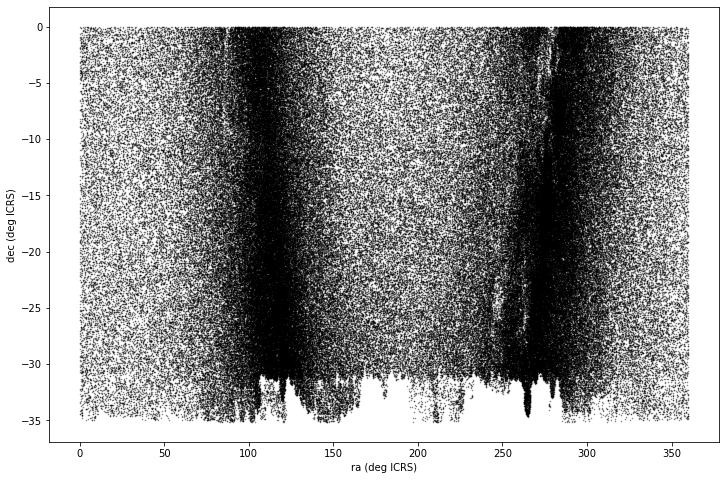

In [6]:
#Let's look at position on the sky, just to check
ra=results['ra']
dec=results['dec']

plt.plot(ra,dec, 'ko',alpha=0.5,markersize=0.5)
plt.xlabel('ra (deg ICRS)')
plt.ylabel('dec (deg ICRS)')

Text(0, 0.5, 'b (deg Galactic)')

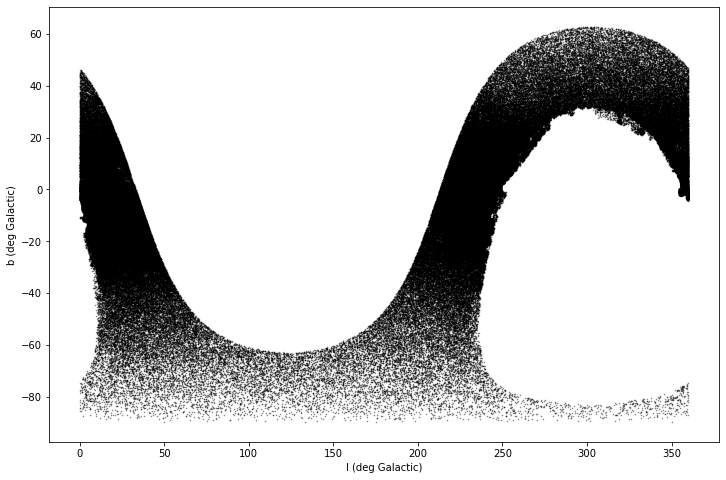

In [7]:
l=results['l']
b=results['b']

plt.plot(l,b, 'ko',alpha=0.5,markersize=0.5)
plt.xlabel('l (deg Galactic)')
plt.ylabel('b (deg Galactic)')

In [8]:
dm = 5.0*np.log10(1000.0/results['parallax'])-5.0
absmag_g = results['g_mean_psf_mag']-dm
absmag_r = results['r_mean_psf_mag']-dm
absmag_i = results['i_mean_psf_mag']-dm
absmag_z = results['z_mean_psf_mag']-dm
absmag_y = results['y_mean_psf_mag']-dm
col_gi = results['g_mean_psf_mag'] - results['i_mean_psf_mag']
col_ri = results['r_mean_psf_mag'] - results['i_mean_psf_mag']
col_iz = results['i_mean_psf_mag'] - results['z_mean_psf_mag']
col_iy = results['i_mean_psf_mag'] - results['y_mean_psf_mag']
mag_g=results['g_mean_psf_mag']
mag_r=results['r_mean_psf_mag']
mag_i=results['i_mean_psf_mag']
mag_z=results['z_mean_psf_mag']
mag_y=results['y_mean_psf_mag']

(11.0, 23.0)

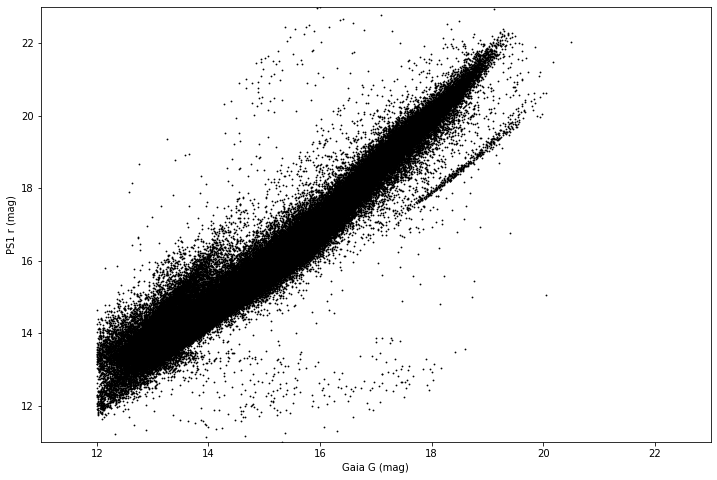

In [9]:
#check on Gaia - PS1 correlation. 
plt.plot(results['phot_g_mean_mag'],results['g_mean_psf_mag'],'ko',markersize=0.8)
plt.xlabel('Gaia G (mag)')
plt.ylabel('PS1 r (mag)')
plt.ylim(11.0,23.0)
plt.xlim(11.0,23.0)

(-2.0, 5.0)

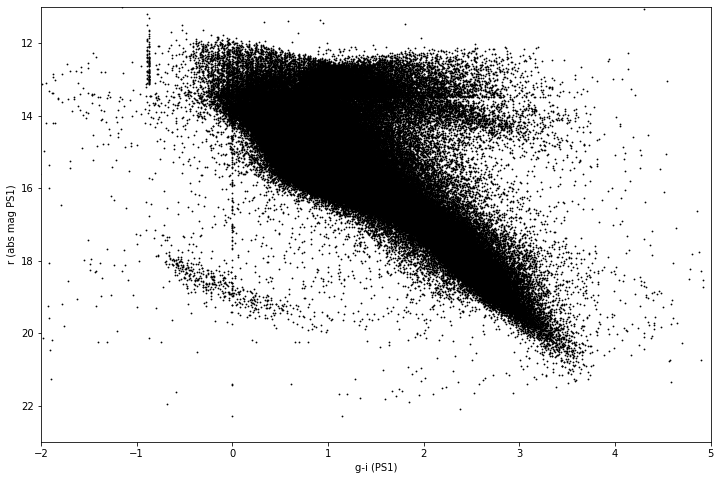

In [10]:
#check color mag PS1 correlation. 
plt.plot(col_gi,results['r_mean_psf_mag'],'ko',markersize=0.8)
plt.xlabel('g-i (PS1)')
plt.ylabel('r (abs mag PS1)')
plt.ylim(23,11.0)
plt.xlim(-2,5)



In [11]:
#LSST saturation for 15 second exposure in 0.7 arcsec seeing according to LSST Science Book
#u, g, r, i, z, y =
#14.7, 15.7, 15.8, 15.8, 15.3 and 13.9
bright15=[14.7,15.7,15.8,15.8,15.3,13.9]
bright30=bright15+2.5*np.log10(30.0/15.0)
bright01=bright15+2.5*np.log10(1.0/15.0)
bright03=bright15+2.5*np.log10(3.0/15.0)
bright05=bright15+2.5*np.log10(5.0/15.0)
#August 2020 report includes simulations of 1s and 5s short exposures. 
# See page 40, PSTN-051 https://pstn-051.lsst.io


In [12]:
#look at this just to make sure it went the right direction.  
bright01


array([11.75977185, 12.75977185, 12.85977185, 12.85977185, 12.35977185,
       10.95977185])

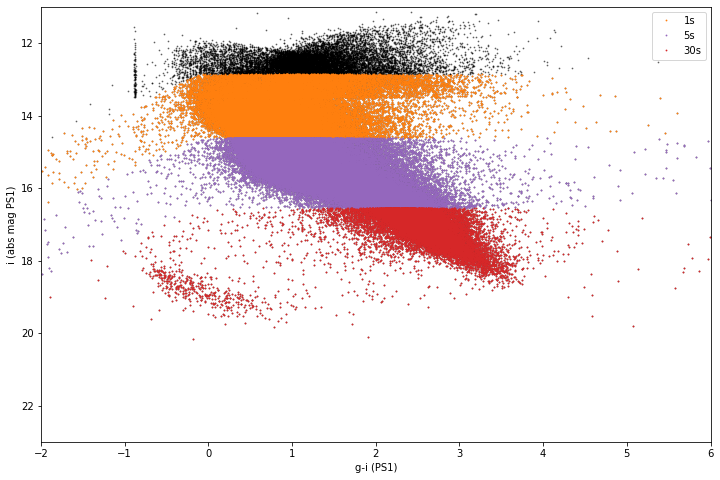

In [13]:
igood = (results['i_mean_psf_mag'] > bright30[3]) & (results['g_mean_psf_mag'] > bright30[1])
ishort = (results['i_mean_psf_mag'] > bright05[3]) & (results['g_mean_psf_mag'] > bright05[1]) & ((results['i_mean_psf_mag'] < bright30[3]) | (results['g_mean_psf_mag'] < bright30[1]))
iveryshort = (results['i_mean_psf_mag'] > bright01[3]) & (results['g_mean_psf_mag'] > bright01[1]) & ((results['i_mean_psf_mag'] < bright05[3]) | (results['g_mean_psf_mag'] < bright05[1]))
#
plt.plot(col_gi,mag_i,'ko',markersize=0.8,alpha=0.5)
plt.plot(col_gi[iveryshort],mag_i[iveryshort],'o',color='C1',markersize=0.8,label='1s')
plt.plot(col_gi[ishort],mag_i[ishort],'o',color='C4',markersize=0.8,label='5s')
plt.plot(col_gi[igood],mag_i[igood],'o',color='C3',markersize=0.8,label='30s')
plt.xlabel('g-i (PS1)')
plt.ylabel('i (abs mag PS1)')
plt.ylim(23,11.0)
plt.xlim(-2,6)
plt.legend();

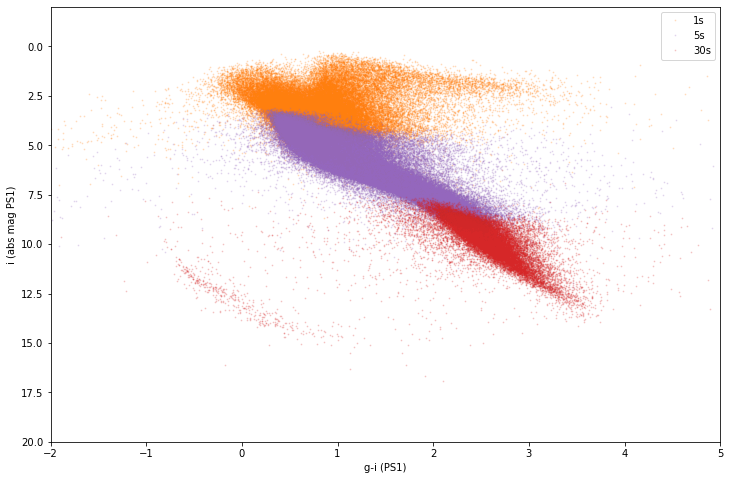

In [14]:
igood = (results['i_mean_psf_mag'] > bright30[3]) & (results['g_mean_psf_mag'] > bright30[1])
ishort = (results['i_mean_psf_mag'] > bright05[3]) & (results['g_mean_psf_mag'] > bright05[1]) & ((results['i_mean_psf_mag'] < bright30[3]) | (results['g_mean_psf_mag'] < bright30[1]))
iveryshort = (results['i_mean_psf_mag'] > bright01[3]) & (results['g_mean_psf_mag'] > bright01[1]) & ((results['i_mean_psf_mag'] < bright05[3]) | (results['g_mean_psf_mag'] < bright05[1]))
#
#plt.plot(col_gi,absmag_i,'ko',markersize=0.5,alpha=0.1)
plt.plot(col_gi[iveryshort],absmag_i[iveryshort],'o',color='C1',markersize=0.8,label='1s',alpha=0.2)
plt.plot(col_gi[ishort],absmag_i[ishort],'o',color='C4',markersize=0.8,label='5s',alpha=0.2)
plt.plot(col_gi[igood],absmag_i[igood],'o',color='C3',markersize=0.8,label='30s',alpha=0.2)
plt.xlabel('g-i (PS1)')
plt.ylabel('i (abs mag PS1)')
plt.ylim(20,-2.0)
plt.xlim(-2,5)
plt.legend();

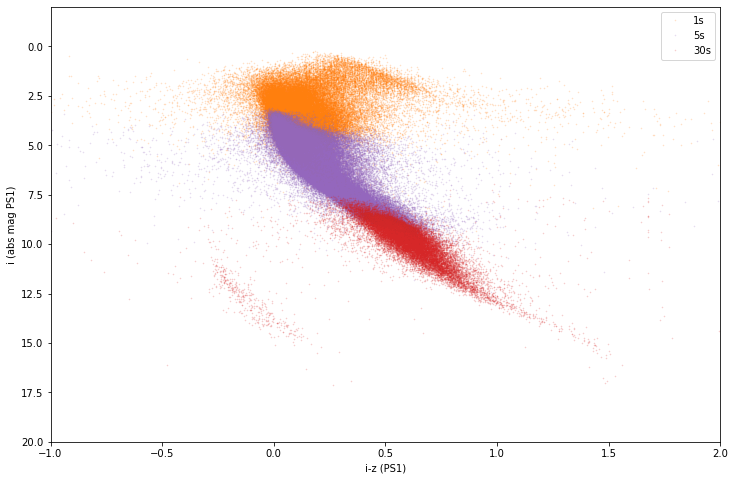

In [15]:
igood = (results['i_mean_psf_mag'] > bright30[3]) & (results['z_mean_psf_mag'] > bright30[4])
ishort = (results['i_mean_psf_mag'] > bright05[3]) & (results['z_mean_psf_mag'] > bright05[4])& ((results['i_mean_psf_mag'] < bright30[3]) | (results['z_mean_psf_mag'] < bright30[4])) 
iveryshort = (results['i_mean_psf_mag'] > bright01[3]) & (results['z_mean_psf_mag'] > bright01[4]) & ((results['i_mean_psf_mag'] < bright05[3]) | (results['z_mean_psf_mag'] < bright05[4]))
#
#plt.plot(col_iz,absmag_i,'ko',markersize=0.6,alpha=0.1)
plt.plot(col_iz[iveryshort],absmag_i[iveryshort],'o',color='C1',markersize=0.6,label='1s',alpha=0.2)
plt.plot(col_iz[ishort],absmag_i[ishort],'o',color='C4',markersize=0.6,label='5s',alpha=0.2)
plt.plot(col_iz[igood],absmag_i[igood],'o',color='C3',markersize=0.6,label='30s',alpha=0.2)
plt.xlabel('i-z (PS1)')
plt.ylabel('i (abs mag PS1)')
plt.ylim(20,-2.0)
plt.xlim(-1,2)
plt.legend();

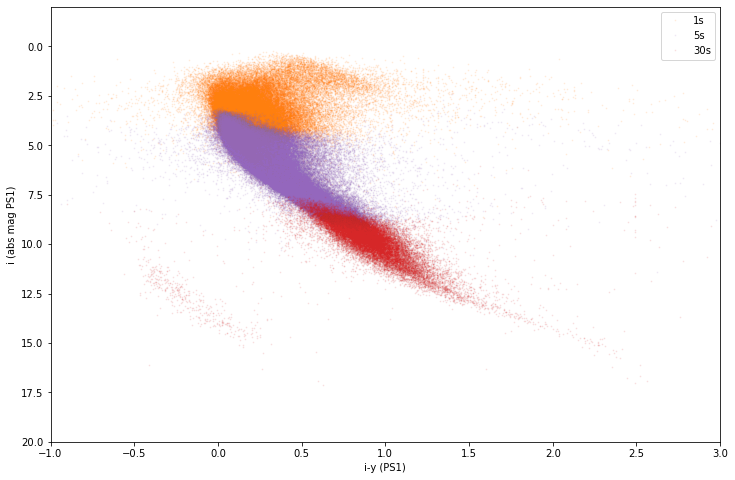

In [16]:
igood = (results['i_mean_psf_mag'] > bright30[3]) & (results['y_mean_psf_mag'] > bright30[5])
ishort = (results['i_mean_psf_mag'] > bright05[3]) & (results['y_mean_psf_mag'] > bright05[5]) & ((results['i_mean_psf_mag'] < bright30[3]) | (results['y_mean_psf_mag'] < bright30[5]))
iveryshort = (results['i_mean_psf_mag'] > bright01[3]) & (results['y_mean_psf_mag'] > bright01[5]) & ((results['i_mean_psf_mag'] < bright05[3]) | (results['y_mean_psf_mag'] < bright05[5]))
#
#plt.plot(col_iy,absmag_i,'ko',markersize=0.8,alpha=0.1)
plt.plot(col_iy[iveryshort],absmag_i[iveryshort],'o',color='C1',markersize=0.8,label='1s',alpha=0.1)
plt.plot(col_iy[ishort],absmag_i[ishort],'o',color='C4',markersize=0.8,label='5s',alpha=0.1)
plt.plot(col_iy[igood],absmag_i[igood],'o',color='C3',markersize=0.8,label='30s',alpha=0.1)
plt.xlabel('i-y (PS1)')
plt.ylabel('i (abs mag PS1)')
plt.ylim(20,-2.0)
plt.xlim(-1,3)
plt.legend()

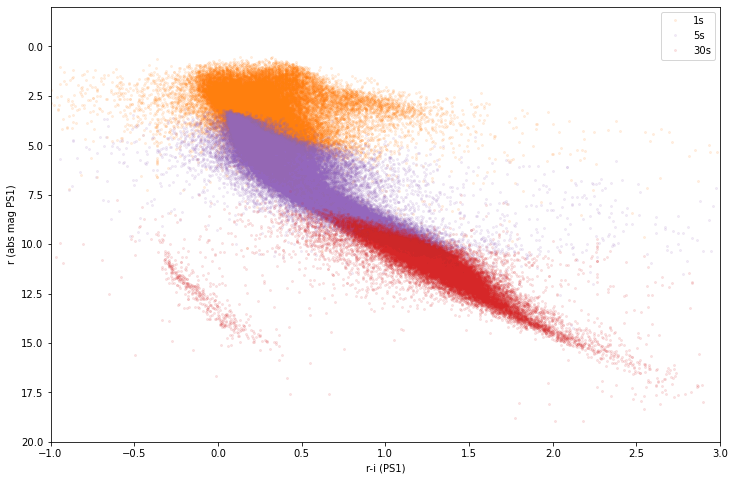

In [17]:
igood = (results['i_mean_psf_mag'] > bright30[3]) & (results['r_mean_psf_mag'] > bright30[2])
ishort = (results['i_mean_psf_mag'] > bright05[3]) & (results['r_mean_psf_mag'] > bright05[2]) & ((results['i_mean_psf_mag'] < bright30[3]) | (results['r_mean_psf_mag'] < bright30[2]))
iveryshort = (results['i_mean_psf_mag'] > bright01[3]) & (results['r_mean_psf_mag'] > bright01[2]) & ((results['i_mean_psf_mag'] < bright05[3]) | (results['r_mean_psf_mag'] < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(col_ri[iveryshort],absmag_r[iveryshort],'o',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(col_ri[ishort],absmag_r[ishort],'o',color='C4',markersize=2,label='5s',alpha=0.1)
plt.plot(col_ri[igood],absmag_r[igood],'o',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r-i (PS1)')
plt.ylabel('r (abs mag PS1)')
plt.ylim(20,-2.0)
plt.xlim(-1,3)
plt.legend()
plt.savefig('LSST-Gaia-PS1-ri-mr.png');

In [18]:
mask_not_plane=(np.abs(results['b'])> 20) 

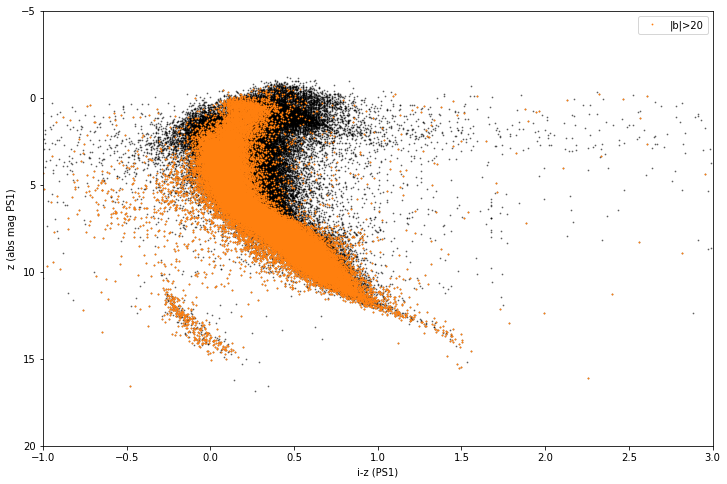

In [19]:
plt.plot(col_iz,absmag_z,'ko',markersize=0.8,alpha=0.5)
plt.plot(col_iz[mask_not_plane],absmag_z[mask_not_plane],'o',color='C1',markersize=0.8,label='|b|>20')
plt.xlabel('i-z (PS1)')
plt.ylabel('z (abs mag PS1)')
plt.ylim(20,-5.0)
plt.xlim(-1,3)
plt.legend();

In [20]:
distance = 1000.0/results['parallax']

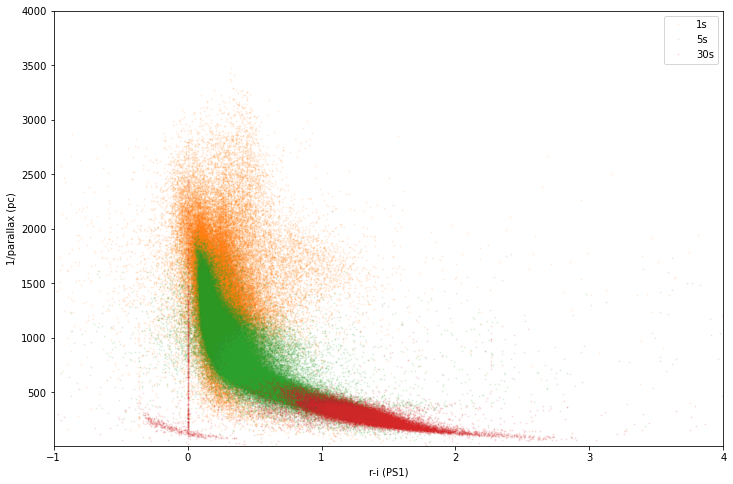

In [21]:
igood = (results['i_mean_psf_mag'] > bright30[3]) & (results['r_mean_psf_mag'] > bright30[2])
ishort = (results['i_mean_psf_mag'] > bright05[3]) & (results['r_mean_psf_mag'] > bright05[2]) & ((results['i_mean_psf_mag'] < bright30[3]) | (results['r_mean_psf_mag'] < bright30[2]))
iveryshort = (results['i_mean_psf_mag'] > bright01[3]) & (results['r_mean_psf_mag'] > bright01[2]) & ((results['i_mean_psf_mag'] < bright05[3]) | (results['r_mean_psf_mag'] < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(col_ri[iveryshort],distance[iveryshort],'.',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(col_ri[ishort],distance[ishort],'.',color='C2',markersize=2,label='5s',alpha=0.1)
plt.plot(col_ri[igood],distance[igood],'.',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r-i (PS1)')
plt.ylabel('1/parallax (pc)')
plt.ylim(10,4000)
plt.xlim(-1,4)
plt.legend()
plt.savefig('LSST-Gaia-PS1-ri-distance.png');

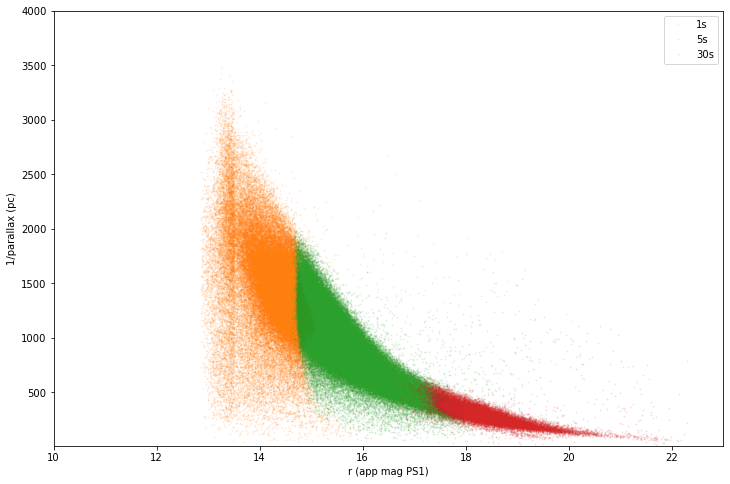

In [22]:
igood = (results['i_mean_psf_mag'] > bright30[3]) & (results['r_mean_psf_mag'] > bright30[2])
ishort = (results['i_mean_psf_mag'] > bright05[3]) & (results['r_mean_psf_mag'] > bright05[2]) & ((results['i_mean_psf_mag'] < bright30[3]) | (results['r_mean_psf_mag'] < bright30[2]))
iveryshort = (results['i_mean_psf_mag'] > bright01[3]) & (results['r_mean_psf_mag'] > bright01[2]) & ((results['i_mean_psf_mag'] < bright05[3]) | (results['r_mean_psf_mag'] < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(mag_r[iveryshort],distance[iveryshort],'.',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(mag_r[ishort],distance[ishort],'.',color='C2',markersize=2,label='5s',alpha=0.1)
plt.plot(mag_r[igood],distance[igood],'.',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r (app mag PS1)')
plt.ylabel('1/parallax (pc)')
plt.ylim(10,4000)
plt.xlim(10,23)
plt.legend()
plt.savefig('LSST-Gaia-PS1-mr-distance.png');

In [23]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'az-paper-twocol',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']